## Problem statement

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Project\Third-Phase-Practice-Projects\Grades\grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

#### Column Description

- Seat No : The enrolled number of candidate that took the exams

- CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
- All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam


### Analysing basic metrics

In [4]:
df.shape

(571, 43)

In [5]:
df.isna().sum().sum()

425

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [7]:
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

- From above analysis we can say that all columns except cgpa and seat number are categorical data
- there are many nan values which are needed to be treated

#### Missing value  Treatment

In [8]:
df.dropna().shape

(417, 43)

In [9]:
#  loss % if nans  dropped will be
((571-417)/571)*100

26.970227670753065

#### we will be loosing around 27% data therefore we must impute them with Mod values

In [10]:
# droping duplicates if any
df.drop_duplicates(inplace=True)

In [11]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')

for i in df.drop(columns='CGPA').columns:
    df[i]=si.fit_transform(df[[i]])
    

In [12]:
df.isna().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

### Encoading Categorical Data



In [13]:
# finding catogerical data
unq_list = []
for i in df.drop(columns=['CGPA','Seat No.']).columns:
    for j in df[i].unique().tolist():
        unq_list.append(j)

        
    

In [14]:
unq_list = set(unq_list)
unq_list

{'A',
 'A+',
 'A-',
 'B',
 'B+',
 'B-',
 'C',
 'C+',
 'C-',
 'D',
 'D+',
 'F',
 'I',
 'W',
 'WU'}

- from domain knowledge we know that i,w,wu are equivivalent to f


In [15]:
df = df.replace({'A+':11,'A':10,'A-':9,'B+':8,'B':7,
                 'B-':6,'C+':5,'C':4,'C-':3,'D+':2,
                 'D':1,'F':0,'I':0,'W':0,'WU':0})

In [16]:
# label encoader for seat no
from sklearn.preprocessing import LabelEncoder
lben = LabelEncoder()
df['Seat No.']=lben.fit_transform(df['Seat No.'])
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,6,2,3,4,3,2,1,3,6,...,3,3,3,3,9,10,3,7,9,2.205
1,1,10,1,2,1,6,4,1,10,2,...,2,1,4,1,9,6,4,4,7,2.008
2,2,10,7,10,6,8,10,6,8,9,...,7,7,10,4,10,10,10,9,10,3.608
3,3,1,5,2,1,1,9,2,3,1,...,2,4,2,3,6,7,5,5,5,1.906
4,4,9,9,9,8,10,10,9,8,10,...,6,8,8,6,9,10,9,9,10,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,7,10,10,9,11,10,9,9,11,...,9,9,10,10,10,8,8,7,10,3.798
567,567,11,10,10,10,10,10,10,9,10,...,8,8,10,10,9,7,9,4,9,3.772
568,568,7,10,9,8,10,10,10,10,10,...,9,7,10,8,10,4,8,9,9,3.470
569,569,10,8,1,10,1,2,6,3,6,...,1,7,7,3,1,4,7,6,4,2.193


#### since seat no and index numbers are same we can remove seat no column

In [17]:
df = df.drop(columns='Seat No.')

In [18]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,6,2,3,4,3,2,1,3,6,3,...,3,3,3,3,9,10,3,7,9,2.205
1,10,1,2,1,6,4,1,10,2,1,...,2,1,4,1,9,6,4,4,7,2.008
2,10,7,10,6,8,10,6,8,9,9,...,7,7,10,4,10,10,10,9,10,3.608
3,1,5,2,1,1,9,2,3,1,5,...,2,4,2,3,6,7,5,5,5,1.906
4,9,9,9,8,10,10,9,8,10,9,...,6,8,8,6,9,10,9,9,10,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,7,10,10,9,11,10,9,9,11,8,...,9,9,10,10,10,8,8,7,10,3.798
567,11,10,10,10,10,10,10,9,10,10,...,8,8,10,10,9,7,9,4,9,3.772
568,7,10,9,8,10,10,10,10,10,7,...,9,7,10,8,10,4,8,9,9,3.470
569,10,8,1,10,1,2,6,3,6,3,...,1,7,7,3,1,4,7,6,4,2.193


### Graphical analysis

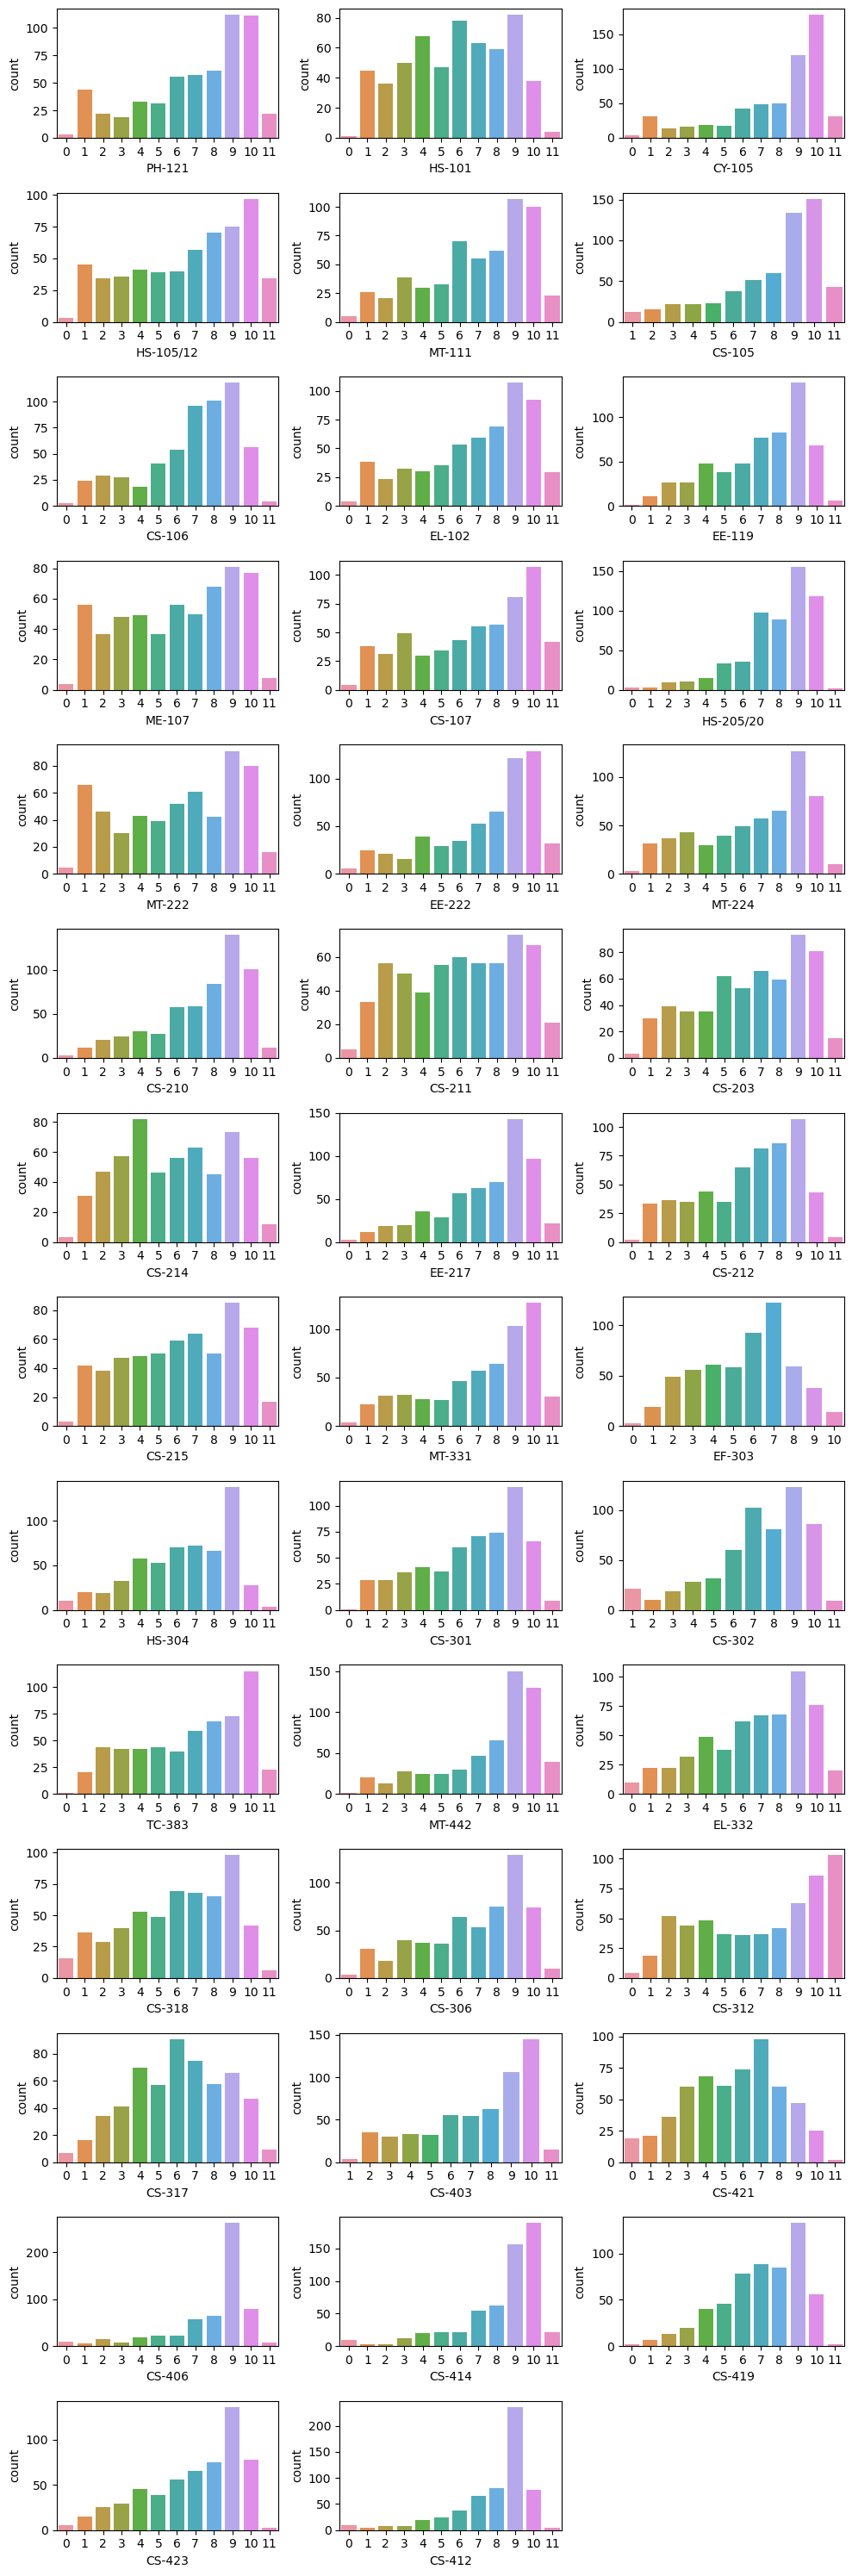

In [19]:
plt.figure(figsize=(10,30))
pn = 1
for i in df.drop(columns='CGPA').columns:
    sns.countplot(df,x=i,ax=plt.subplot(14,3,pn))
    pn+=1
plt.tight_layout()    

- in almost all subjects students scoring A- and A are high
- this is actually a good sign since most of the students are gaining good scores
- cources CS-421,CS-318,CS-302 ARE HAVING max fail percentage

### Multivariate corelation analysis

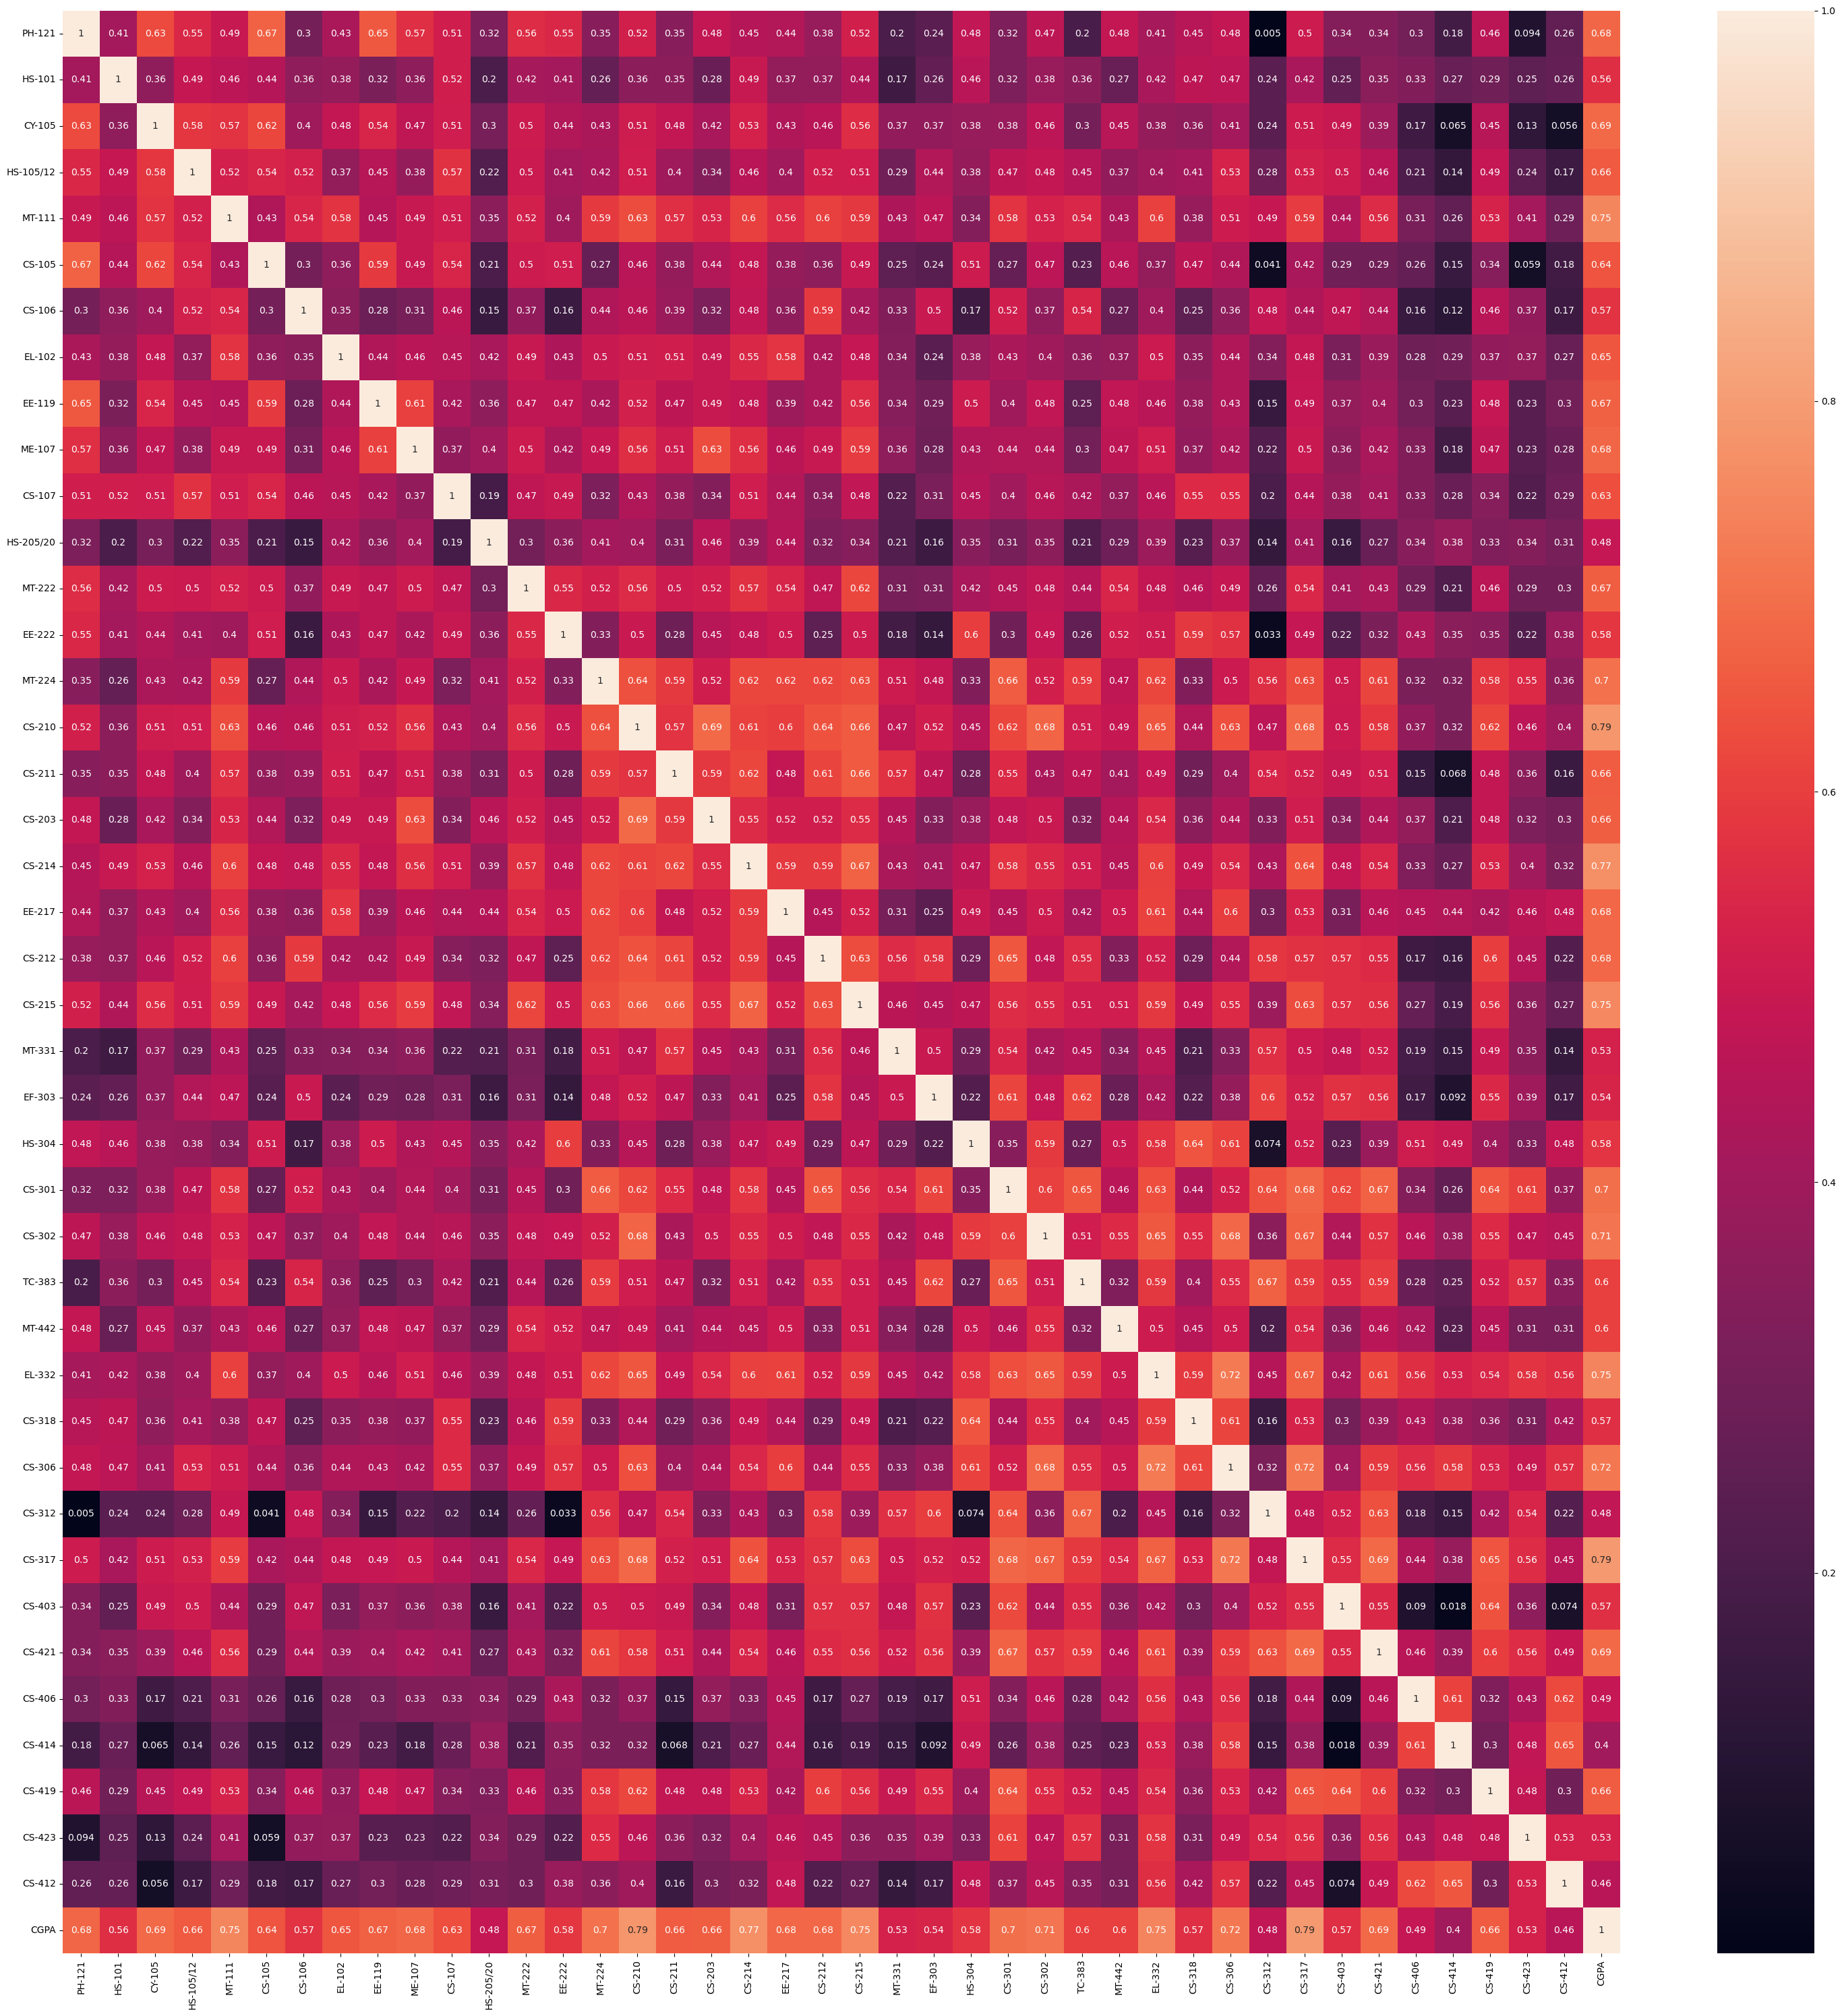

In [20]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr().abs(),annot=True)
plt.tight_layout()

- there is no multi colinearity observed and all labels are equqlly contributing bor variables

### Standerd Scaler

In [21]:
x = df.drop(columns='CGPA')
y = df['CGPA']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.35135931, -1.39946208, -1.72676736, ..., -1.84547449,
         0.02830163,  0.53150059],
       [ 1.0111274 , -1.76686109, -2.08517672, ..., -1.39126504,
        -1.12600056, -0.40808714],
       [ 1.0111274 ,  0.43753297,  0.78209819, ...,  1.33399169,
         0.79783642,  1.00129446],
       ...,
       [-0.01073764,  1.53973   ,  0.42368883, ...,  0.42557278,
         0.79783642,  0.53150059],
       [ 1.0111274 ,  0.80493198, -2.44358609, ..., -0.02863667,
        -0.35646577, -1.81746875],
       [-1.03260267, -1.76686109, -2.44358609, ...,  0.42557278,
        -2.28030274, -2.28726262]])

### Train test Split

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr = LinearRegression()

In [24]:
# finding best random state
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train_score = r2_score(y_train,pred_train)
    test_score = r2_score(y_test,pred_test)
    if round(train_score*100,0) == round(test_score*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_score*100,'Test accuracy':test_score*100},ignore_index=True)

    
tts_df.sort_values('Test accuracy',ascending=False)  


,Random state,Train accuracy,Test accuracy
91,877.0,93.653890,94.487035
79,719.0,93.567994,94.483676
55,543.0,93.665994,94.477000
73,665.0,93.636124,94.464138
10,189.0,93.578331,94.461508
...,...,...,...
3,43.0,93.875477,93.541223
50,486.0,93.910870,93.540706
31,343.0,93.823219,93.524026
82,743.0,93.930077,93.518556


- Therefore best random state is 877

In [25]:
# Training model at best Random state
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=877)

## Training models

#### Linear Regression

In [26]:
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    lr_r2_test_score = r2_score(y_test,pred_test)
    print(lr_r2_test_score*100,"%")

94.48703508777201 %


In [27]:
# Find best cv
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x_scaled,y,cv=i,scoring='r2',)
    lr_cv_score_mean = lr_cv_score.mean()
    print('\ncv = ',i,'\nCross Validation score = ',round(lr_cv_score_mean*100,2),'%','\nr2 score = ',round(lr_r2_test_score*100,2),'%','\nDifference = ',round((lr_r2_test_score*100 - lr_cv_score_mean*100),2),'%',end = '\n\n')



cv =  2 
Cross Validation score =  83.4 % 
r2 score =  94.49 % 
Difference =  11.09 %


cv =  3 
Cross Validation score =  89.02 % 
r2 score =  94.49 % 
Difference =  5.47 %


cv =  4 
Cross Validation score =  83.52 % 
r2 score =  94.49 % 
Difference =  10.97 %


cv =  5 
Cross Validation score =  91.06 % 
r2 score =  94.49 % 
Difference =  3.43 %


cv =  6 
Cross Validation score =  91.21 % 
r2 score =  94.49 % 
Difference =  3.28 %


cv =  7 
Cross Validation score =  91.04 % 
r2 score =  94.49 % 
Difference =  3.45 %


cv =  8 
Cross Validation score =  91.15 % 
r2 score =  94.49 % 
Difference =  3.34 %


cv =  9 
Cross Validation score =  91.61 % 
r2 score =  94.49 % 
Difference =  2.87 %



In [28]:
# BEST CV = 9
cv = 9

In [29]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test r2 score','Difference'])

In [30]:
# getting result at best cv
lr_cv_score=cross_val_score(lr,x_scaled,y,cv=cv,scoring='r2')
lr_cv_score_mean = lr_cv_score.mean()
print('\nCross Validation score = ',round(lr_cv_score_mean*100,4),'%','\nr2 score = ',round(lr_r2_test_score*100,2),'%','\nDifference = ',round((lr_r2_test_score*100 - lr_cv_score_mean*100),2),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Linear regression','CV score':round(lr_cv_score_mean*100,4),'Test r2 score':round(lr_r2_test_score*100,4),'Difference':round(np.abs(lr_r2_test_score*100 - lr_cv_score_mean*100),4)},ignore_index=True)


Cross Validation score =  91.614 % 
r2 score =  94.49 % 
Difference =  2.87 %



##### DecisionTreeRegressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred_test = dtr.predict(x_test)
dtr_r2_test_score = r2_score(y_test,dtr_pred_test)
print(dtr_r2_test_score*100,"%")

78.7558699215277 %


In [32]:
# getting result at best cv
dtr_cv_score=cross_val_score(dtr,x_scaled,y,cv=cv,scoring='r2')
dtr_cv_score_mean = dtr_cv_score.mean()
print('\nCross Validation score = ',round(dtr_cv_score_mean*100,4),'%','\nr2 score = ',round(dtr_r2_test_score*100,2),'%','\nDifference = ',round((dtr_r2_test_score*100 - dtr_cv_score_mean*100),2),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Decision Tree Regressor','CV score':round(dtr_cv_score_mean*100,4),'Test r2 score':round(dtr_r2_test_score*100,4),'Difference':round(np.abs(dtr_r2_test_score*100 - dtr_cv_score_mean*100),4)},ignore_index=True)


Cross Validation score =  83.1671 % 
r2 score =  78.76 % 
Difference =  -4.41 %



##### RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred_test = rfr.predict(x_test)
rfr_r2_test_score = r2_score(y_test,rfr_pred_test)

print(rfr_r2_test_score*100,"%")

93.36036551257031 %


In [34]:
# getting result at best cv
rfr_cv_score=cross_val_score(rfr,x_scaled,y,cv=cv,scoring='r2')
rfr_cv_score_mean = rfr_cv_score.mean()
print('\nCross Validation score = ',round(rfr_cv_score_mean*100,4),'%','\nr2 score = ',round(rfr_r2_test_score*100,2),'%','\nDifference = ',round((rfr_r2_test_score*100 - rfr_cv_score_mean*100),2),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Random Forest Regressor','CV score':round(rfr_cv_score_mean*100,4),'Test r2 score':round(rfr_r2_test_score*100,4),'Difference':round(np.abs(rfr_r2_test_score*100 - rfr_cv_score_mean*100),4)},ignore_index=True)


Cross Validation score =  92.0997 % 
r2 score =  93.36 % 
Difference =  1.26 %



#### AdaBoostRegressor

In [35]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred_test = abr.predict(x_test)
abr_r2_test_score = r2_score(y_test,abr_pred_test)
print(abr_r2_test_score*100,"%")

88.26958049376252 %


In [36]:
# getting result at best cv
abr_cv_score=cross_val_score(abr,x_scaled,y,cv=cv,scoring='r2')
abr_cv_score_mean = abr_cv_score.mean()
print('\nCross Validation score = ',round(abr_cv_score_mean*100,4),'%','\nr2 score = ',round(abr_r2_test_score*100,2),'%','\nDifference = ',round((abr_r2_test_score*100 - abr_cv_score_mean*100),2),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'AdaBoost Regressor','CV score':round(abr_cv_score_mean*100,4),'Test r2 score':round(abr_r2_test_score*100,4),'Difference':round(np.abs(abr_r2_test_score*100 - abr_cv_score_mean*100),4)},ignore_index=True)


Cross Validation score =  87.355 % 
r2 score =  88.27 % 
Difference =  0.91 %



#### GradientBoostingRegressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred_test = gbr.predict(x_test)
gbr_r2_test_score = r2_score(y_test,gbr_pred_test)
print(gbr_r2_test_score*100,"%")

94.01338390306765 %


In [38]:
# getting result at best cv
gbr_cv_score=cross_val_score(gbr,x_scaled,y,cv=cv,scoring='r2')
gbr_cv_score_mean = gbr_cv_score.mean()
print('\nCross Validation score = ',round(gbr_cv_score_mean*100,4),'%','\nr2 score = ',round(gbr_r2_test_score*100,2),'%','\nDifference = ',round((gbr_r2_test_score*100 - gbr_cv_score_mean*100),2),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Gradient Boosting Regressor','CV score':round(gbr_cv_score_mean*100,4),'Test r2 score':round(gbr_r2_test_score*100,4),'Difference':round(np.abs(gbr_r2_test_score*100 - gbr_cv_score_mean*100),4)},ignore_index=True)


Cross Validation score =  93.9697 % 
r2 score =  94.01 % 
Difference =  0.04 %



#### XGBRegressor

In [39]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
xgbr_pred_test = xgbr.predict(x_test)
xgbr_r2_test_score = r2_score(y_test,xgbr_pred_test)
print(xgbr_r2_test_score*100,"%")

92.74100694689093 %


In [40]:
# getting result at best cv
xgbr_cv_score=cross_val_score(xgbr,x_scaled,y,cv=cv,scoring='r2')
xgbr_cv_score_mean = xgbr_cv_score.mean()
print('\nCross Validation score = ',round(xgbr_cv_score_mean*100,4),'%','\nr2 score = ',round(xgbr_r2_test_score*100,2),'%','\nDifference = ',round((xgbr_r2_test_score*100 - xgbr_cv_score_mean*100),2),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'XGB Regressor','CV score':round(xgbr_cv_score_mean*100,4),'Test r2 score':round(xgbr_r2_test_score*100,4),'Difference':round(np.abs(xgbr_r2_test_score*100 - xgbr_cv_score_mean*100),4)},ignore_index=True)


Cross Validation score =  91.2145 % 
r2 score =  92.74 % 
Difference =  1.53 %



In [41]:
ms_df.sort_values('Test r2 score',ascending=False)

,Model,CV score,Test r2 score,Difference
0,Linear regression,91.6140,94.4870,2.8730
4,Gradient Boosting Regressor,93.9697,94.0134,0.0437
2,Random Forest Regressor,92.0997,93.3604,1.2606
5,XGB Regressor,91.2145,92.7410,1.5265
3,AdaBoost Regressor,87.3550,88.2696,0.9145
1,Decision Tree Regressor,83.1671,78.7559,4.4112


- Gboost is giving max r2 score with least difference

### Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
grid_parm = {'max_depth':[2,3,4,5],
             'learning_rate':[0.01,0.05,0.02,0.1,0.2,0.5],
             'criterion':['friedman_mse', 'squared_error', 'mae'],
             'n_estimators':[100,110,120,130],}

In [43]:
gcv = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=grid_parm,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mae', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 130}

In [44]:
final_model = GradientBoostingRegressor(learning_rate= 0.2,max_depth= 3,n_estimators= 130,criterion='mae')
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)

In [45]:
r2 = r2_score(y_test, final_model_test_pred)
mse_score = mean_absolute_error(y_test, final_model_test_pred)
mae_score = mean_squared_error(y_test, final_model_test_pred)
print('\nR2 Score = ',r2,'\nMean Squared error = ',mse_score,'\nMean absolute error = ',mae_score)


R2 Score =  0.9333262364253763 
Mean Squared error =  0.1075727119964186 
Mean absolute error =  0.019368518844335453


Text(0.5, 1.0, 'Actual vs Predicted Test')

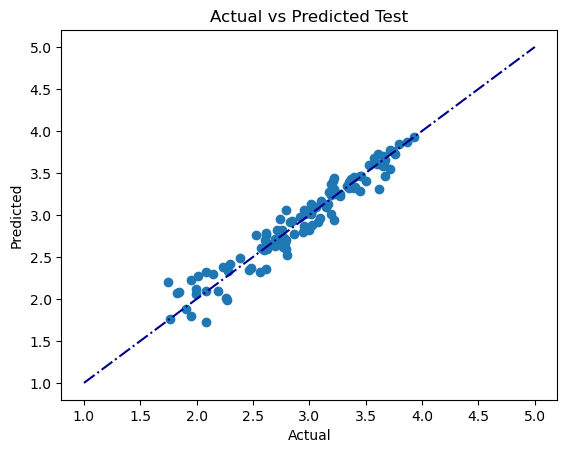

In [47]:
plt.scatter(y_test, final_model_test_pred)

plt.plot([1,5],[1,5],color='darkblue',linestyle='-.',label = "Diagnol")
plt.ylabel("Predicted")
plt.xlabel('Actual')
plt.title('Actual vs Predicted Test')

### Saving Model

In [48]:
import pickle
with open('final_gb_classifier_model.pkl', 'wb') as file:

    pickle.dump(final_model, file)

##### from graph and r2 score we can confidently say that our model predicted 93% of data accurately